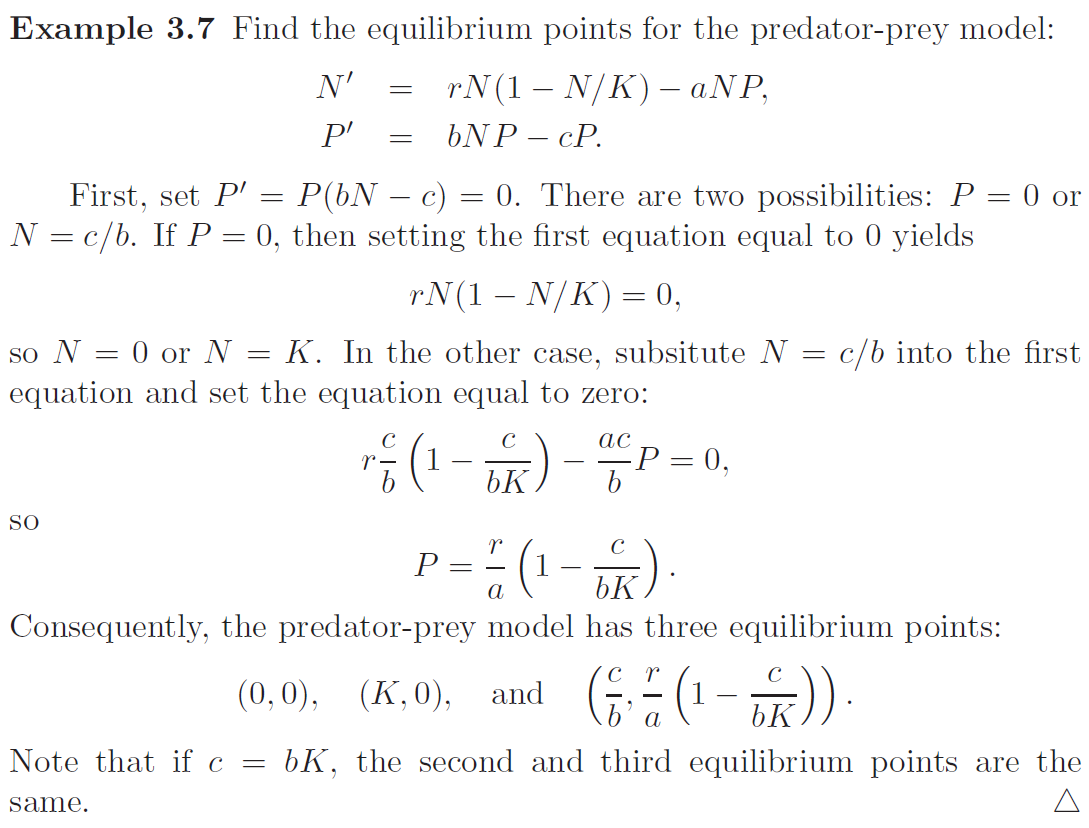

In [57]:
t,r,a,b,c,K = var('t,r,a,b,c,K')
N = function('N')(t)
P = function('P')(t)

Nt = r*N*(1-N/K) - a*N*P
Pt = b*N*P -c*P
 
eq1 = diff(N, t) == Nt
eq2 = diff(P, t) == Pt

solution = desolve_system([eq1, eq2], [N, P], ics=[0, 1, 1], ivar=t)

for i in range(2):
    print(solution[i].simplify_full())


N(t) == ilt(-(K*a*laplace(N(t)*P(t), t, g3557) + r*laplace(N(t)^2, t, g3557) - K)/(K*g3557 - K*r), g3557, t)
P(t) == ilt((b*laplace(N(t)*P(t), t, g3557) + 1)/(c + g3557), g3557, t)


In [58]:
t,r,a,b,c,N,P = var('t,r,a,b,c, N,P')

Nt = r*N*(1-N/K) - a*N*P
Pt = b*N*P -c*P

crit_points = solve([Nt==0, Pt==0], N, P)

for point in crit_points:
    print(point)


[N == 0, P == 0]
[N == K, P == 0]
[N == c/b, P == (K*b - c)*r/(K*a*b)]


In [59]:
pars = {r: 0.1, a: 0.1, b: 0.1, c: 0.1, K: 10}

F = (Nt.subs(pars), Pt.subs(pars))

print(F)

(-0.0100000000000000*(N - 10)*N - 0.100000000000000*N*P, 0.100000000000000*N*P - 0.100000000000000*P)


In [60]:
g = Graphics()

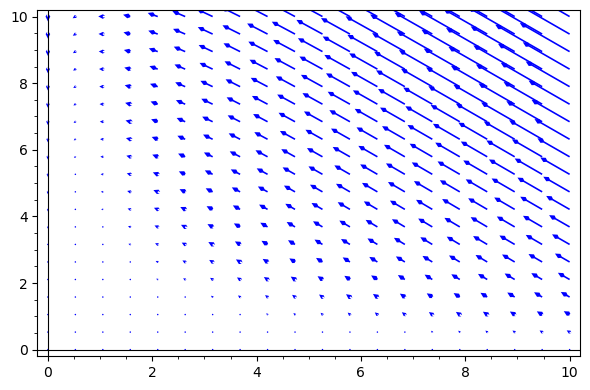

In [61]:

vector_field = plot_vector_field(F, (N, 0, 10), (P, 0, 10), color='blue', headlength=3, headwidth=3)
g += vector_field
g.show()

In [62]:

crit_points_subs = list()
for point in crit_points:
    crit_points_subs.append(tuple(map(lambda x: x.subs(pars).rhs(), point)))

crit_points_subs


[(0, 0), (10, 0), (1.00000000000000, 0.900000000000000)]

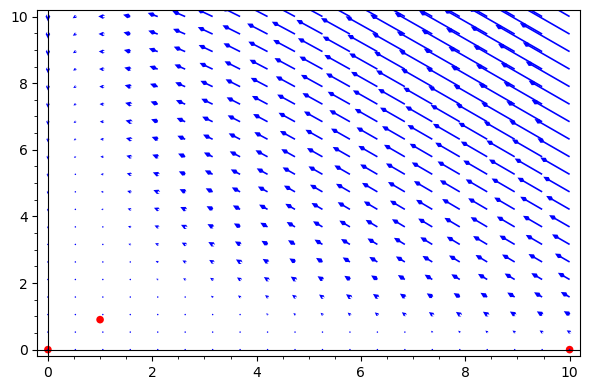

In [63]:
for point in crit_points_subs:
    g += point2d(point, color='red', pointsize=30)

g.show()

In [64]:
# Define variables and functions
t, r, a, b, c, K = var('t r a b c K')
N, P = var('N P')
x1 = function('x1')(t)
x2 = function('x2')(t)


# Define the system of differential equations
Nt = r*N*(1-N/K) - a*N*P
Pt = b*N*P - c*P

dvars = { N: x1, P: x2 }


# Set the parameters
pars = {r: 1/10, a: 1/10, b: 1/10, c: 1/10, K: 10}

In [65]:
vf = [Nt.subs(pars), Pt.subs(pars)]
vf 

[-1/100*(N - 10)*N - 1/10*N*P, 1/10*N*P - 1/10*P]

In [66]:

# Define the system of equations
edo_system = [Nt.subs(dvars).subs(pars), Pt.subs(dvars).subs(pars)]
edo_system


[-1/100*(x1(t) - 10)*x1(t) - 1/10*x1(t)*x2(t), 1/10*x1(t)*x2(t) - 1/10*x2(t)]

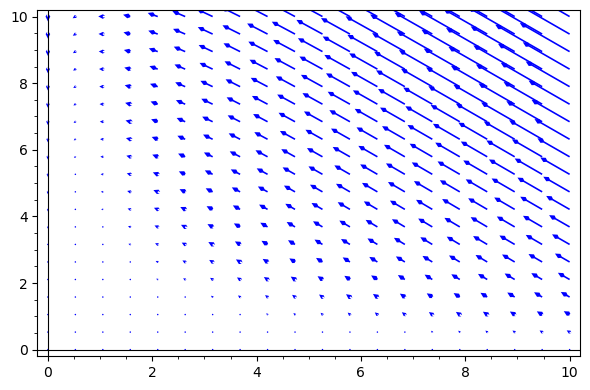

In [67]:


# Create a Graphics object
g = Graphics()

# Plot the vector field
vector_field = plot_vector_field(vf, (N, 0, 10), (P, 0, 10), color='blue', headlength=3, headwidth=3)
g += vector_field
g.show()


In [68]:
# Define a range of initial conditions
initial_conditions = [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]
initial_conditions

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]

In [69]:

# Solve the system for each initial condition and plot the solution curves
for ic in initial_conditions:
    try:
        sol = desolve_system_rk4(vf, [N, P], ics=[0, ic[0], ic[1]], ivar=t, end_points=10, step=0.1)
        print(sol)
        Q = [[j,k]  for i,j,k in sol]
        g+=list_plot(Q, plotjoined=True)+point2d(ic, color='green', pointsize=30)
    except Exception as e:
        print(e)

[[0, 1, 1], [0.1, 0.9990010156385138, 0.9999950033849594], [0.2, 0.9980041248806346, 0.9999800274910433], [0.3, 0.9970094207021464, 0.999955094167127], [0.4, 0.9960169953867243, 0.9999202264840642], [0.5, 0.9950269405182265, 0.9998754487253548], [0.6000000000000001, 0.9940393469732292, 0.9998207863775926], [0.7000000000000001, 0.9930543049138035, 0.9997562661206965], [0.8, 0.9920719037805347, 0.9996819158179311], [0.9, 0.9910922322857795, 0.9995977645057221], [1.0, 0.9901153784071636, 0.9995038423832705], [1.1, 0.9891414293813156, 0.9994001808019708], [1.2, 0.9881704716978372, 0.9992868122546396], [1.3, 0.9872025910935073, 0.9991637703645583], [1.4, 0.9862378725467184, 0.9990310898743359], [1.5, 0.9852764002721446, 0.9988888066345966], [1.6, 0.9843182577156383, 0.9987369575924981], [1.7, 0.983363527549354, 0.9985755807800852], [1.8, 0.982412291667097, 0.9984047153024841], [1.9, 0.9814646311798966, 0.9982244013259429], [2.0, 0.9805206264117989, 0.9980346800657239], [2.1, 0.9795803568958

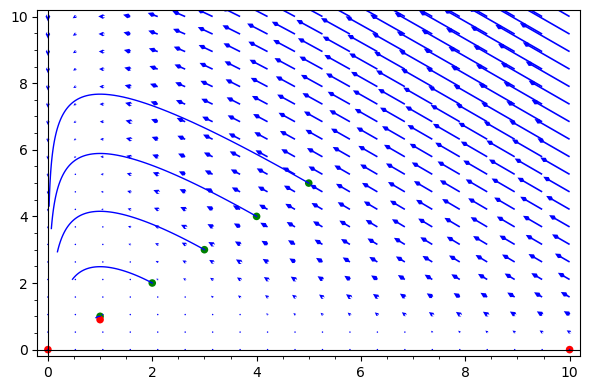

In [70]:

# Plot the critical points
crit_points = solve([Nt==0, Pt==0], N, P)
crit_points_subs = [tuple(map(lambda x: x.subs(pars).rhs(), point)) for point in crit_points]
for point in crit_points_subs:
    g += point2d(point, color='red', pointsize=30)

# Show the plot
g.show()